### LASSO (Linear Absolute Shrinkage and Selection Opeartor) Regression


- Effect of standardized scaling on lasso regression


- Error = $\sum_{i=1}^{m} (y_i - \sum_{j=1}^p \beta_i x_{ij})^2 + \lambda \sum_{j=1}^{p}|\beta_i| $ 

- L1 Regression: $\lambda$ is a shrinkage parameter

- if $\lambda$ is large the complexity of the model (coefficients become smaller and smaller) is penalized, i.e., the model becomes simple (say linear). The model tends to have a higher bias


- if $\lambda$ is small, the model adapts higher complexity, the model tends to overfit having a higher variance. 

In [1]:
# import modules

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open the text file and read all lines in a list
with open(".\lasso_lr_data.txt") as file:
    data_line = file.readlines()

# remove "\n" and split and convert each line to an array of float
data = []
for i in range(len(data_line)):
    data.append(np.array(data_line[i].rstrip("\n").split(","), dtype=float))


In [3]:
# covert list to an array

data = np.array(data)

print(data.shape)

(100, 7)


In [4]:
X = data[:, :-1]  # take all rows and all columns until the last column

y = data[:, -1]  # take the last column as a target variable y

In [5]:
print(X.shape)
print(y.shape)

(100, 6)
(100,)


In [6]:
X[:3, :]

array([[ 1.25664,  2.04978, -6.2364 ,  4.71926, -4.26931,  0.2059 ],
       [-3.89012, -0.37511,  6.14979,  4.94585, -3.57844,  0.0064 ],
       [ 5.09784,  0.9812 , -0.29939,  5.85805,  0.28297, -0.20626]])

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data = data, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'],dtype='float')

In [9]:
df.head()

,X1,X2,X3,X4,X5,X6,y
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


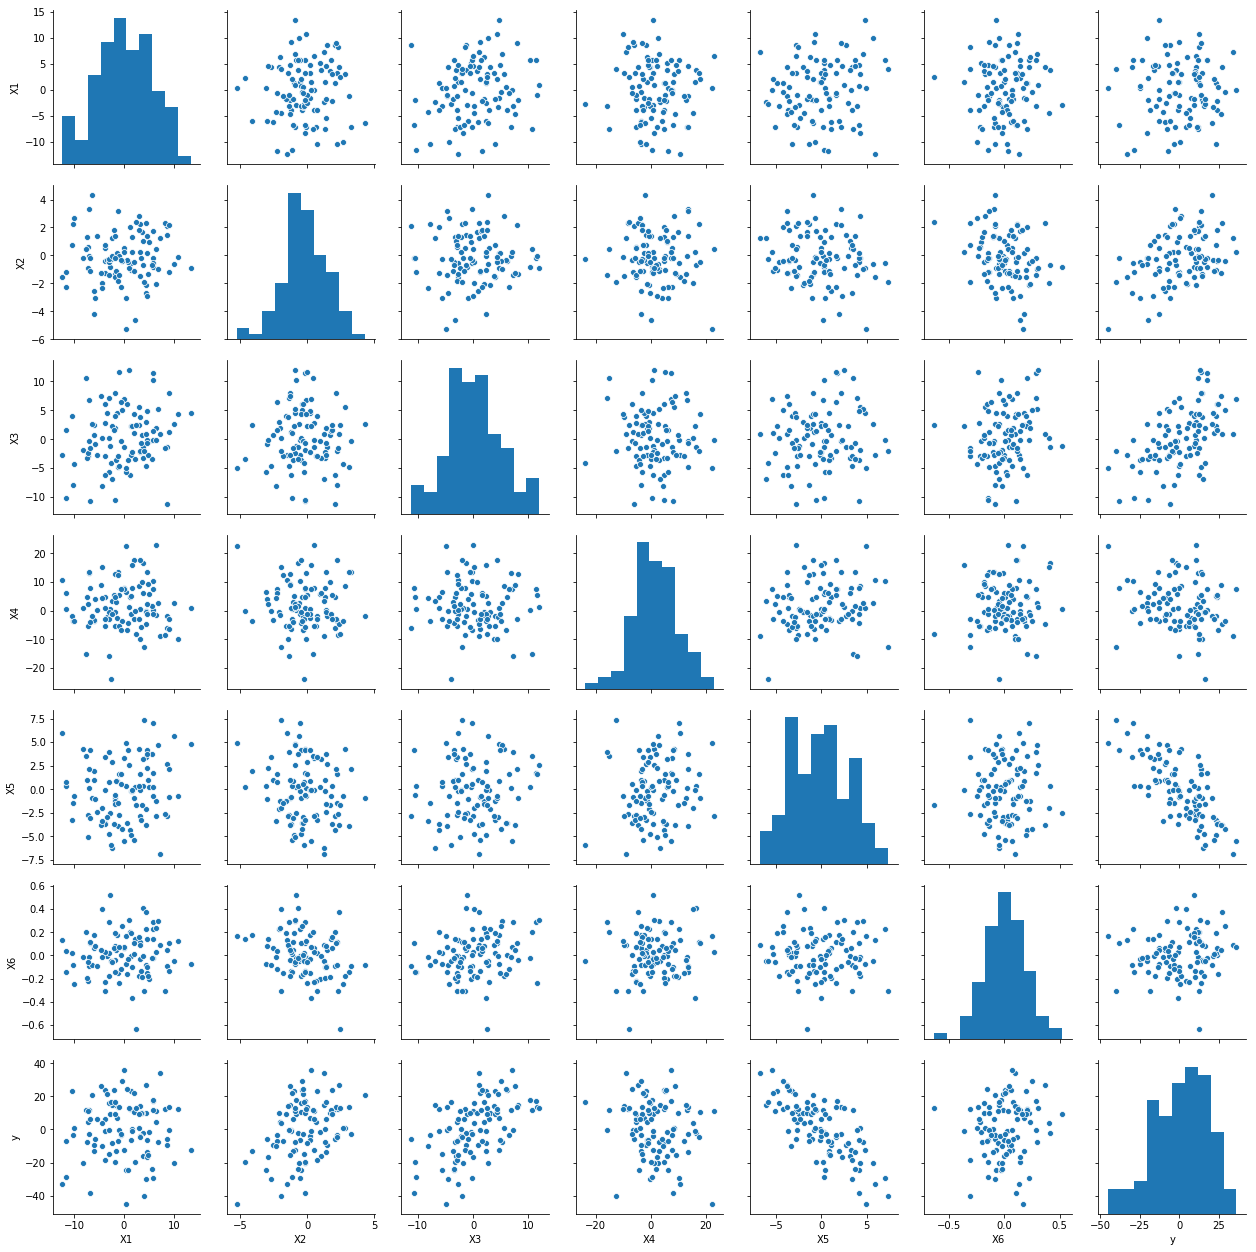

In [10]:
import seaborn as sns
sns.pairplot(data=df)
plt.show()

In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [12]:
# We use lasso regression without scaling
# When lasso regression is used without scaling, 
# then predictor with small values, e.g., 4, 7, 8 are penalized highly 
# than that of predictors with higher values, say, 10,000, 20,000
'''
When one feature is on a small range, say from 0 to 10, and another is on a large range, 
say from 0 to 1 000 000, applying regularization is going to unfairly punish 
the feature with the small range. 
In fact, features with small ranges need to have larger coefficients 
compared to features with large ranges in order to have 
the same effect on the outcome of the data.
'''


def lasso_reg_without_scaling(X, y):
    lasso_reg = Lasso()
    lasso_reg.fit(X, y)
    
    return lasso_reg.coef_
    

In [13]:
lasso_coeff = lasso_reg_without_scaling(X, y)
print(np.round(lasso_coeff, 4))

[ 0.      2.3579  2.0044 -0.0551 -3.9281  0.    ]


In [14]:
def lasso_reg_with_scaling(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lasso_reg = Lasso()
    lasso_reg.fit(X_scaled, y)
    
    return lasso_reg.coef_


In [15]:
lasso_coeff_scaling = lasso_reg_with_scaling(X, y)
print(np.round(lasso_coeff_scaling, 4))

[  0.       3.9075   9.0258  -0.     -11.783    0.4534]
